# Classifying Iris Flowers using Support Vector Machines

Support Vector Machines (SVMs) are non-parametric learners that find the hyperplane which best separates data points of different classes while maximizing the margin between the classes, allowing for effective classification or regression.

The objective of this notebook is to build a classifier using SVMs to categorize iris flowers into their respective species based on their features.

## Imports

In [148]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

## Data

Load the Iris dataset

In [133]:
iris = load_iris()
X = iris.data
y = iris.target

Perform feature scaling

In [134]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Model

In SVM, a kernel is a function that computes the similarity or inner product between pairs of data points in a higher-dimensional space. Kernels allow SVMs to work effectively in cases where data points are not linearly separable in the original feature space. A linear kernel in SVM represents a simple dot product between input feature vectors, while an RBF (Radial Basis Function) kernel computes the similarity between points based on their Euclidean distance, effectively transforming the data into a higher-dimensional space and enabling the modeling of non-linear decision boundaries.

Initialize SVM the classifiers, one with a linear kernel and the other with a RBF kernel. 

In [135]:
svm_classifier_linear = SVC(kernel='linear', C=1, probability=True)
svm_classifier_rbf = SVC(kernel='rbf', C=1, gamma='scale', probability=True)


## Evaluation

Perform k-fold cross-validation

In [136]:
num_folds = 5

First the linear kernel SVM

In [137]:
scores_linear = cross_val_score(svm_classifier_linear, X_scaled, y, cv=num_folds)
average_accuracy_linear = np.mean(scores_linear)
average_predicted_labels_linear = cross_val_predict(svm_classifier_linear, X_scaled, y, cv=num_folds)

Then the RBF kernel

In [138]:
scores_rbf = cross_val_score(svm_classifier_rbf, X_scaled, y, cv=num_folds)
average_accuracy_rbf = np.mean(scores_rbf)
average_predicted_labels_rbf = cross_val_predict(svm_classifier_rbf, X_scaled, y, cv=num_folds)

Print accuracy for both kernels

In [139]:
print(f'Average Accuracy (Linear Kernel): {average_accuracy_linear:.4f}')
print(f'Average Accuracy (RBF Kernel): {average_accuracy_rbf:.4f}')

Average Accuracy (Linear Kernel): 0.9667
Average Accuracy (RBF Kernel): 0.9667


### Classification Reports

Print classification reports

In [140]:
target_names = iris.target_names

First the linear kernel SVM

In [141]:
report_linear = classification_report(y, average_predicted_labels_linear, target_names=target_names)
print(report_linear)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.94      0.95        50
   virginica       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



Then the RBF kernel

In [142]:
report_rbf = classification_report(y, average_predicted_labels_rbf, target_names=target_names)
print(report_rbf)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.96      0.95        50
   virginica       0.96      0.94      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



### Confusion Matrix

Print confusion matrix for the average predicted labels. 

First the linear kernel SVM

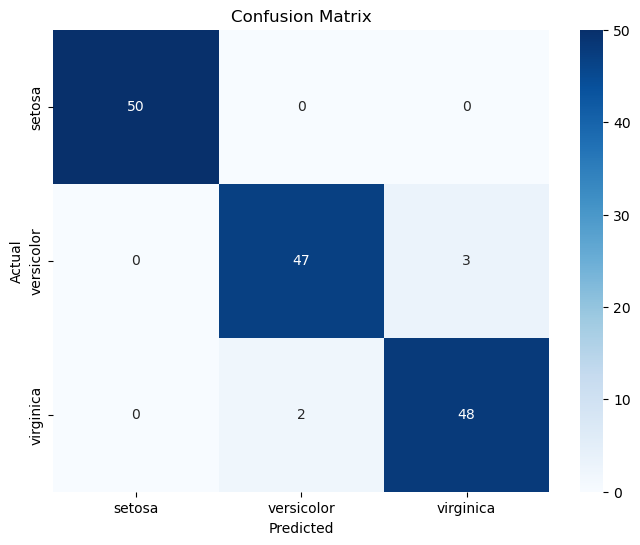

In [143]:
conf_matrix = confusion_matrix(y, average_predicted_labels_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Then the RBF kernel

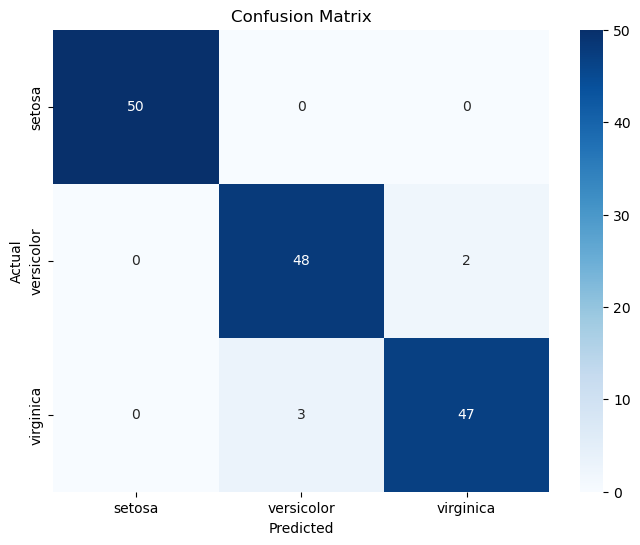

In [144]:
conf_matrix = confusion_matrix(y, average_predicted_labels_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Feature Importance 

We see that the added complexity of the RBF kernel does not improve performance, and therefore stick to the linear kernel SVM. 

Train the final model on the entire dataset. 

In [145]:
svm_classifier_linear.fit(X_scaled, y)

SVC(C=1, kernel='linear', probability=True)

Get the feature importance from the final SVM model

In [146]:
feature_importance = np.abs(svm_classifier_linear.coef_)

The feature importance is visualized using bar plots to identify the importance of different features in making predictions.

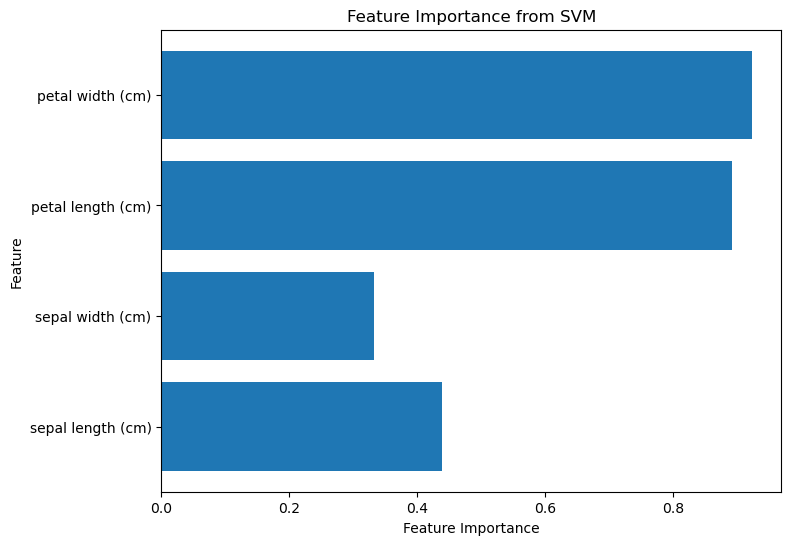

In [147]:
feature_names = iris.feature_names
plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_names)), feature_importance[0], align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from SVM')
plt.show()